# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

* Read the datasets

In [2]:
data = pd.read_csv("Financials.csv")

* Copy the original datasets

In [3]:
df = data.copy()

* Read the Datasets

In [4]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


# The dataset contains various financial and sales-related information, including:

* Segment: the segment to which the sale belongs (e.g., Government, Midmarket)
* Country: the country where the sale occurred
* Product: the name of the product sold
* Discount Band: the discount level applied to the sale
* Units Sold: the number of units sold
* Manufacturing Price: the price at which the product was manufactured
* Sale Price: the price at which the product was sold
* Gross Sales: the total sales before discounts
* Discounts: the amount discounted from the gross sales
* Sales: the total sales after discounts
* COGS (Cost of Goods Sold): the cost to produce the goods sold
* Profit: the profit from the sale (Sales - COGS)
* Date: the date of the sale
* Month Number: the month of the sale (numerical)
* Month Name: the month of the sale (name)
* Year: the year of the sale

# Data Processing

* Handling teh columns

In [5]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the updated column names
df.columns


Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [6]:
df.shape

(700, 16)

* Checking the null values

In [7]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

# Import the visualisation libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

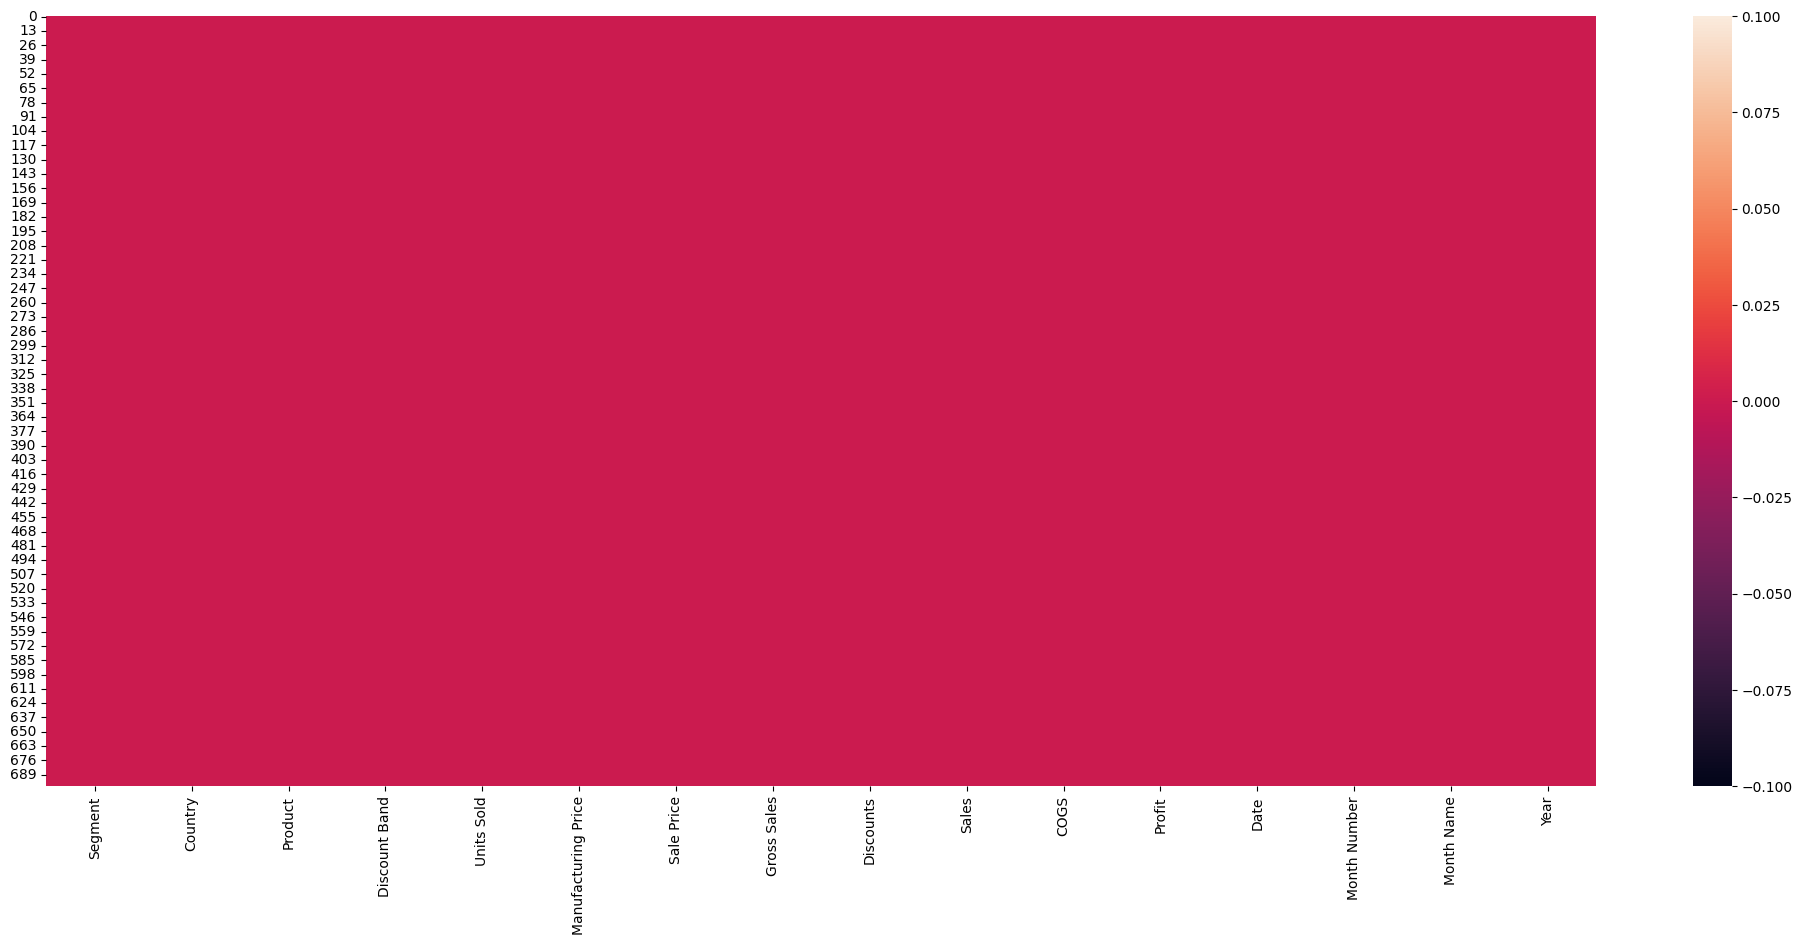

In [9]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull())

* There are no missing values in the dataset, which is a good sign. The descriptive statistics provide some interesting insights:

* Checking the Data types for columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Segment              700 non-null    object
 1   Country              700 non-null    object
 2   Product              700 non-null    object
 3   Discount Band        700 non-null    object
 4   Units Sold           700 non-null    object
 5   Manufacturing Price  700 non-null    object
 6   Sale Price           700 non-null    object
 7   Gross Sales          700 non-null    object
 8   Discounts            700 non-null    object
 9   Sales                700 non-null    object
 10  COGS                 700 non-null    object
 11  Profit               700 non-null    object
 12  Date                 700 non-null    object
 13  Month Number         700 non-null    int64 
 14  Month Name           700 non-null    object
 15  Year                 700 non-null    int64 
dtypes: int64

##  Cleaning the unwated symbols from columns and replace that

In [11]:
df['Units Sold'] = df['Units Sold'].str.replace('$','')
df['Units Sold'] = df['Units Sold'].str.replace('.','')
df['Units Sold'] = df['Units Sold'].str.replace(',','')


In [12]:
df['Manufacturing Price'] = df['Manufacturing Price'].str.replace('$','')
df['Manufacturing Price'] = df['Manufacturing Price'].str.replace('.','')


In [13]:
df['Sale Price'] = df['Sale Price'].str.replace('$','')
df['Sale Price'] = df['Sale Price'].str.replace('.','')
df['Sale Price'] = df['Sale Price'].str.replace(',','')


In [14]:
df['Gross Sales'] = df['Gross Sales'].str.replace('$','')
df['Gross Sales'] = df['Gross Sales'].str.replace('.','')
df['Gross Sales'] = df['Gross Sales'].str.replace(',','')

In [15]:
df['Sales'] = df['Sales'].str.replace('$','')
df['Sales'] = df['Sales'].str.replace('.','')
df['Sales'] = df['Sales'].str.replace(',','')


In [16]:
df['COGS'] = df['COGS'].str.replace('$','')
df['COGS'] = df['COGS'].str.replace('.','')
df['COGS'] = df['COGS'].str.replace(',','')


## Changing the Datatypes

In [17]:
df['Units Sold'] = df['Units Sold'].astype(np.int64)
df['Manufacturing Price'] = df['Manufacturing Price'].astype(np.int64)
df['Sale Price'] = df['Sale Price'].astype(np.int64)
df['Gross Sales'] = df['Gross Sales'].astype(np.int64)
df['Sales'] = df['Sales'].astype(np.int64)
df['COGS'] = df['COGS'].astype(np.int64)

# Update the Profit Columns

In [18]:
df['Profit'] = df['Sales'] - df['COGS']

* Handling the "Discounts" Columns

In [19]:
df['Discounts'] = df['Discounts'].str.replace('$','')
df['Discounts'] = df['Discounts'].str.replace('.','')
df['Discounts'] = df['Discounts'].str.replace(',','')
df['Discounts'] = df['Discounts'].str.strip()
df['Discounts'] = df['Discounts'].str.replace('-','0')

* Changing the Datatype for columns "Discounts"

In [20]:
df['Discounts'] = df['Discounts'].astype('float')

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    int64         
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    int64         
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    int64         
 10  COGS                 700 non-null    int64         
 11  Profit               700 non-null    int64         
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

<Axes: title={'center': 'Data Types'}>

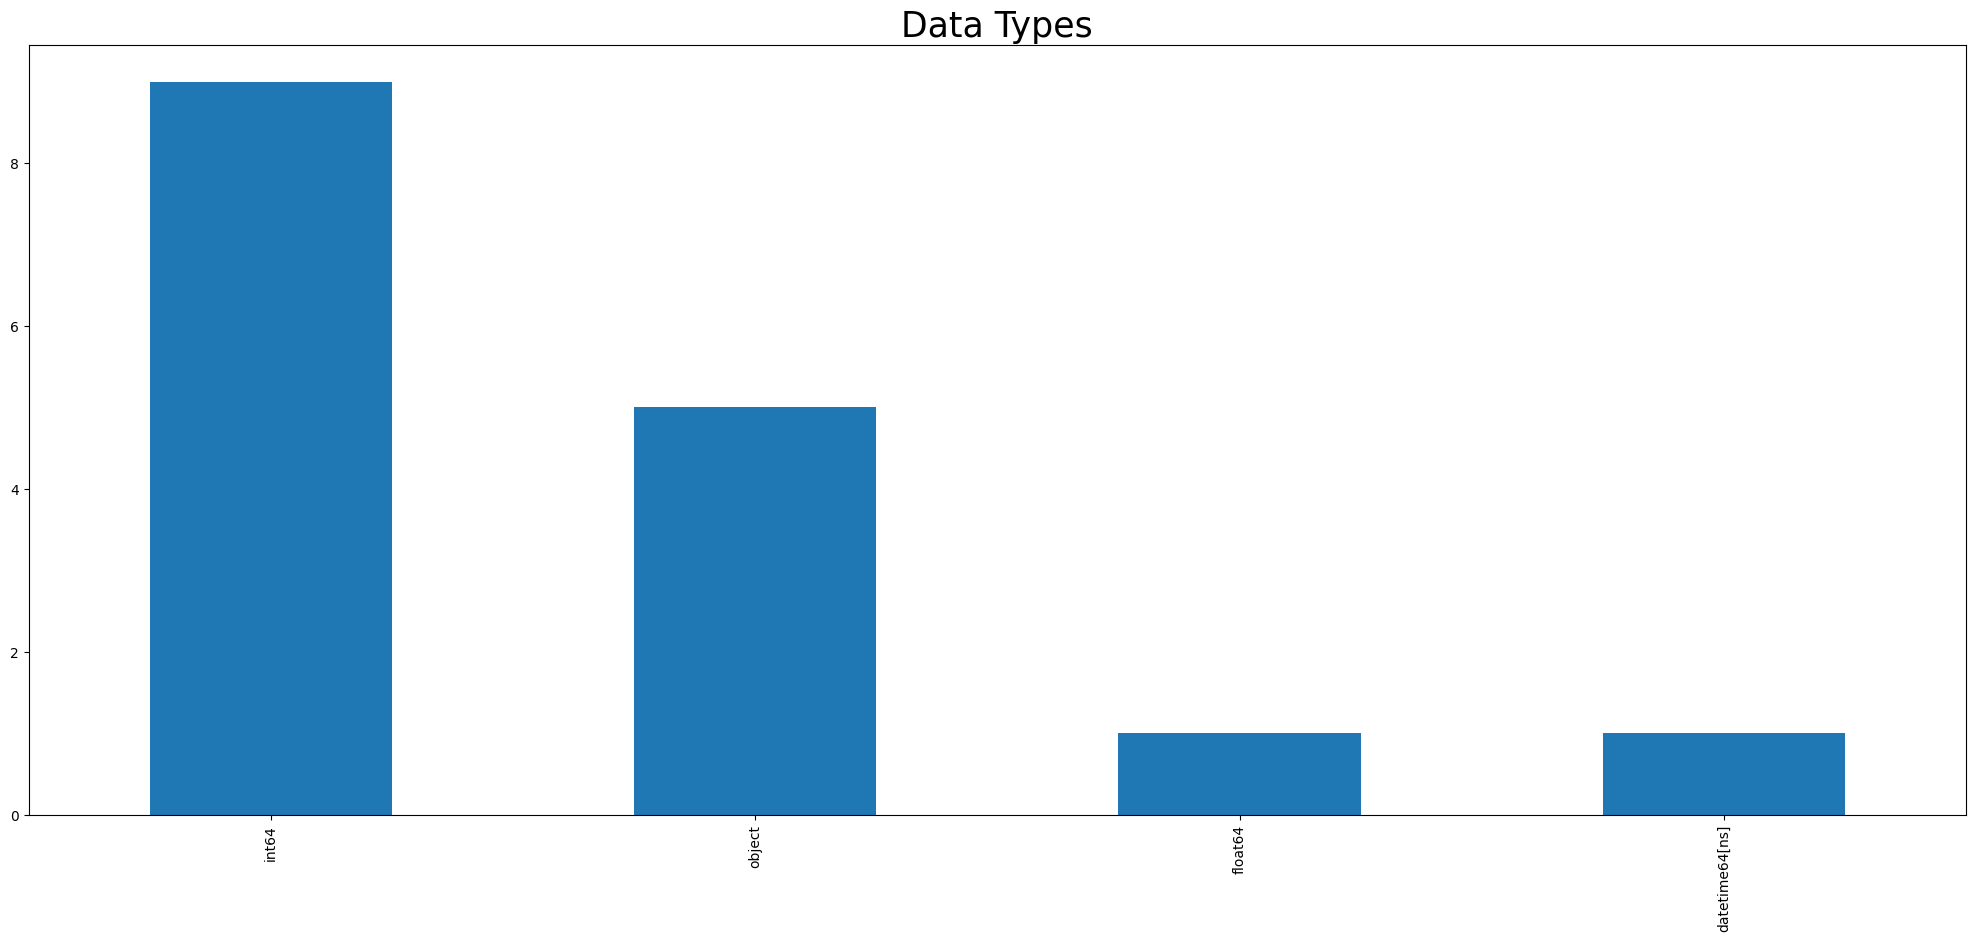

In [23]:
plt.figure(figsize=(25,10))

plt.title('Data Types', fontsize=25)

df.dtypes.value_counts().plot(kind="bar")

In [24]:
df.to_csv('Financials_Final_Data.csv', index=False)

In [25]:
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,161850,300,2000,3237000,0.0,3237000,1618500,1618500,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,132100,300,2000,2642000,0.0,2642000,1321000,1321000,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,217800,300,1500,3267000,0.0,3267000,2178000,1089000,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,88800,300,1500,1332000,0.0,1332000,888000,444000,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,247000,300,1500,3705000,0.0,3705000,2470000,1235000,2014-01-06,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,247500,26000,30000,74250000,11137500.0,63112500,61875000,1237500,2014-01-03,3,March,2014
696,Small Business,Mexico,Amarilla,High,54600,26000,30000,16380000,2457000.0,13923000,13650000,273000,2014-01-10,10,October,2014
697,Government,Mexico,Montana,High,136800,500,700,957600,143640.0,813960,684000,129960,2014-01-02,2,February,2014
698,Government,Canada,Paseo,High,72300,1000,700,506100,75915.0,430185,361500,68685,2014-01-04,4,April,2014
